In [1]:
import calc
import icio
import postproc

import os
import random
import numpy as np
import torch

In [2]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = False  # type: ignore

seed_everything(79)

In [3]:
dir_path = '/opt/ml/project/codes/imagecluster/test_images'

In [4]:
images = icio.read_images(dir_path, size=(224,224))

/opt/ml/project/codes/imagecluster/test_images/20220525_061034.319-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061029.674-2.png/opt/ml/project/codes/imagecluster/test_images/20220525_061008.515-3.png/opt/ml/project/codes/imagecluster/test_images/20220525_060932.653-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_060953.649-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_060944.319-3.png/opt/ml/project/codes/imagecluster/test_images/20220525_060944.319-1.png






/opt/ml/project/codes/imagecluster/test_images/20220525_061014.816-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061021.768-2.png/opt/ml/project/codes/imagecluster/test_images/20220525_061028.092-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061023.383-0.png/opt/ml/project/codes/imagecluster/test_images/20220525_061031.995-1.png
/opt/ml/project/codes/imagecluster/test_images/20220525_061014.816-2.png
/opt/ml/project/codes/imagecluster/test_images/2022052

In [5]:
model = calc.get_model()

2022-05-26 05:04:48.028080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
fingerprints = calc.fingerprints(images, model)
print(fingerprints)

/opt/ml/project/codes/imagecluster/test_images/20220525_061034.319-0.png
1/1 [==============================] - 1s 503ms/step
ret.shape (512,)
<class 'numpy.ndarray'>
/opt/ml/project/codes/imagecluster/test_images/20220525_061053.184-2.png
1/1 [==============================] - 0s 51ms/step
ret.shape (512,)
<class 'numpy.ndarray'>
/opt/ml/project/codes/imagecluster/test_images/20220525_061030.458-0.png
1/1 [==============================] - 0s 52ms/step
ret.shape (512,)
<class 'numpy.ndarray'>
/opt/ml/project/codes/imagecluster/test_images/20220525_061015.611-1.png
1/1 [==============================] - 0s 47ms/step
ret.shape (512,)
<class 'numpy.ndarray'>
/opt/ml/project/codes/imagecluster/test_images/20220525_061021.768-0.png
1/1 [==============================] - 0s 53ms/step
ret.shape (512,)
<class 'numpy.ndarray'>
/opt/ml/project/codes/imagecluster/test_images/20220525_061029.674-2.png
1/1 [==============================] - 0s 48ms/step
ret.shape (512,)
<class 'numpy.ndarray'>
/op

In [7]:
timestamps = icio.read_timestamps(dir_path)

In [14]:
clusters = calc.cluster(fingerprints, sim=0.75, min_csize=3) # 높일수록 엄격하게

#images : #clusters
3 : 4
8 : 1
10 : 2
11 : 1
12 : 1
17 : 1
21 : 1
#images in clusters total:  101


In [15]:
postproc.make_links(clusters, os.path.join(dir_path, 'imagecluster/clusters'))

cluster dir: /opt/ml/project/codes/imagecluster/test_images/imagecluster/clusters


plot array (uint8) size: 33.1611328125 MiB


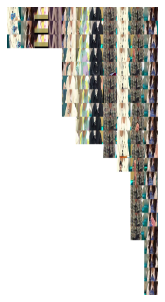

In [16]:
fig, ax = postproc.plot_clusters(clusters, images)
fig.savefig(os.path.join(dir_path, '_cluster.png'))
postproc.plt.show()